# Task to predict the Scaled Sound Pressure Level given certain features.

In [8]:
df = pd.read_excel('airfoil.xlsx', names=['Frequency', 'Angle of Attack', 'Chord Length', 'Free-Steam Velocity', 'Suction side displacement thickness', 'Scaled sound pressure level'])

In [9]:
df.head()

,Frequency,Angle of Attack,Chord Length,Free-Steam Velocity,Suction side displacement thickness,Scaled sound pressure level
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [11]:
df.describe()

,Frequency,Angle of Attack,Chord Length,Free-Steam Velocity,Suction side displacement thickness,Scaled sound pressure level
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [16]:
df.corr()['Scaled sound pressure level'].sort_values()

Frequency                             -0.390686
Suction side displacement thickness   -0.312632
Chord Length                          -0.236657
Angle of Attack                       -0.156027
Free-Steam Velocity                    0.125003
Scaled sound pressure level            1.000000
Name: Scaled sound pressure level, dtype: float64

<AxesSubplot:>

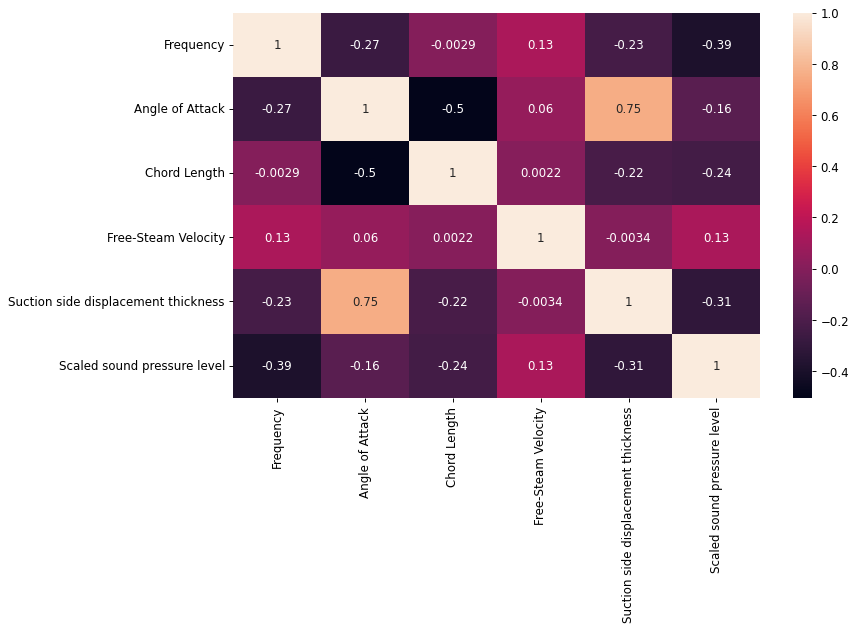

In [20]:
plt.figure(figsize=(10,6), dpi=85)
sns.heatmap(df.corr(), annot=True, cmap='rocket')

In [26]:
X = df.drop(['Scaled sound pressure level'], axis=1)
y = df['Scaled sound pressure level']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
scaler = StandardScaler()

In [32]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    
    model.fit(X_train,y_train)
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae =  mean_absolute_error(y_test, preds)
    print(f'RMSE : {rmse}')
    print(f'MAE : {mae}')
    

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

## KNN

In [36]:
model = KNeighborsRegressor()
run_model(model, scaled_X_train, y_train, scaled_X_test, y_test)

RMSE : 3.474402842161954
MAE : 2.5242514412416845


## SVM

In [37]:
model = SVR()
run_model(model, scaled_X_train, y_train, scaled_X_test, y_test)

RMSE : 3.74403526040039
MAE : 2.832966667830428


## Decision Tree

In [38]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 2.4481871101665837
MAE : 1.7743658536585365


## Random Forest

In [39]:
model = RandomForestRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 1.9155974714976483
MAE : 1.3464268514412416


## AdaBoost

In [43]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 3.873523630124186
MAE : 3.1811364886861075


## GradBoost

In [44]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 2.7412933569116635
MAE : 2.060769219464761


Since the best performing algorithm on our dataset is RandomForestRegressor, we can perfrom GridSearch on it to get even better results for our model

In [45]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {'n_estimators' : [50, 100, 150, 200],
              'bootstrap' : [True, False],
              'oob_score' : [True, False]
             }

In [80]:
rfr = RandomForestRegressor()
rfr_grid = GridSearchCV(rfr, param_grid)

In [82]:
rfr_grid.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [50, 100, 150, 200],
                         'oob_score': [True, False]})

In [83]:
rfr_grid.best_params_

{'bootstrap': True, 'n_estimators': 200, 'oob_score': True}

In [84]:
grid_preds = rfr_grid.predict(X_test)

In [85]:
rmse = np.sqrt(mean_squared_error(y_test,grid_preds))
mae =  mean_absolute_error(y_test, grid_preds)

In [86]:
rmse, mae

(1.9035880984811024, 1.325349423503313)

## Creating Final Model

In [87]:
final_model = RandomForestRegressor(n_estimators=150)
final_model.fit(X,y)

RandomForestRegressor(n_estimators=150)

## Saving Final Model

In [88]:
import joblib

In [89]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [90]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

## Loading Final Model

In [91]:
loaded_model = joblib.load('final_model.pkl')

In [92]:
df.iloc[35]

Frequency                              1000.000000
Angle of Attack                           0.000000
Chord Length                              0.304800
Free-Steam Velocity                      39.600000
Suction side displacement thickness       0.003101
Scaled sound pressure level             127.899000
Name: 35, dtype: float64

In [93]:
col_names = joblib.load('column_names.pkl')

In [94]:
col_names

['Frequency',
 'Angle of Attack',
 'Chord Length',
 'Free-Steam Velocity',
 'Suction side displacement thickness']

In [95]:
loaded_model.predict([[1000, 0.0, 0.3048, 39.6, 0.003101]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([127.82078667])

In [97]:
df.to_csv("Final_Airfoil_Model.csv", index=False)